In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
import datetime as dt
from get_data import get_urls, get_model_data, get_obs_data, get_height_vars, calc_model_height
from functools import partial

In [2]:
pn.extension()

In [3]:
#selection of site
site_name = pn.widgets.Select(
    name="Site", options=['sodankyla','tiksi'], margin=(0, 20, 0, 0)
)

#user selection variable
variable = pn.widgets.Select(
    name="Variables", options=['ta'], margin=(0, 20, 0, 0)
)

#selection of model
model_name = pn.widgets.Select(
    name="model", options=['AROME-Arctic','ifs-ecmwf'], margin=(0, 20, 0, 0)
)

#user selection start and end date only sop 1 as of right now
dates = pn.widgets.DateRangeSlider(
    name='Date Range Slider',
    start=dt.datetime(2018, 2, 1), end=dt.datetime(2018, 3, 31),
    value=(dt.datetime(2018, 2, 1), dt.datetime(2018, 2, 4))
)

#user selection start time for model 
start_time = pn.widgets.Select(
    name="Start time", options=['00','12'], margin=(0, 20, 0, 0)
)

#user selection of which day should be fetched from the model files
#for concat
concat_day = pn.widgets.Select(
    name="Model day selected", options={1:0,2:1,3:2}, margin=(0,20,0,0)
)

top_height = pn.widgets.IntSlider(name='Integer Slider', start=100, end=12000, step=1000, value=100)


In [4]:
def contour(data_mod,variable,top_height):
    
    data_filtered = data_mod[data_mod['height'] < top_height+1000].unstack()
    var = data_filtered[variable].values
    heights = data_filtered['height'].values
    time = data_filtered.index.values
    
    time_w_dims = np.full(np.shape(var.T),time).T


    plt.figure(figsize=(10,5))
    plot = plt.contourf(time_w_dims,heights,var)
    plt.ylim(top = top_height)
    plt.colorbar(plot)

    return plot

In [5]:
@pn.depends(site_name,model_name,variable,dates,start_time,concat_day,top_height)
def get_plot(site_name,model_name,variable,dates,start_time,concat_day,top_height):
    #get data
    variables = get_height_vars(model_name)
    variables.append(variable)
    urls = get_urls(dates[0],dates[1],start_time,model_name,site_name,variables,concat_day)
    data_mod = get_model_data("concatenated",urls[0],concat_day)
    data_mod = calc_model_height(model_name,data_mod)
    #=================
    plot = contour(data_mod,variable,top_height)
    return plot

Column(width_policy='max')
    [0] Markdown(str)
    [1] ParamFunction(function)
    [2] Row
        [0] Column
            [0] Select(margin=(0, 20, 0, 0), name='Site', options=['sodankyla', 'tiksi'], value='sodankyla')
            [1] Select(margin=(0, 20, 0, 0), name='model', options=['AROME-Arctic', ...], value='AROME-Arctic')
            [2] Select(margin=(0, 20, 0, 0), name='Variables', options=['ta'], value='ta')
        [1] Column
            [0] DateRangeSlider(end=datetime.datetime(2018, ..., name='Date Range Slider', start=datetime.datetime(2018, ..., value=(datetime.datetime(2018, ..., value_end=datetime.datetime(2018, ..., value_start=datetime.datetime(2018, ...)
            [1] Select(margin=(0, 20, 0, 0), name='Start time', options=['00', '12'], value='00')
            [2] Select(margin=(0, 20, 0, 0), name='Model day selected', options={1: 0, 2: 1, 3: 2}, value=0)
        [2] Column
            [0] IntSlider(end=12000, name='Integer Slider', start=100, step=1000, value=100)

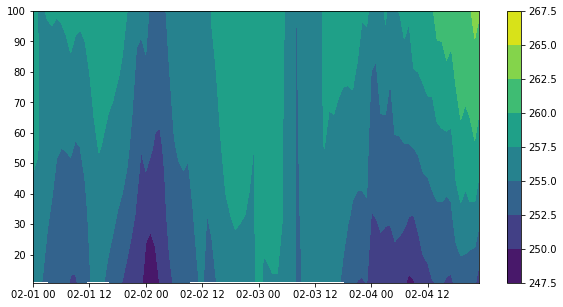

In [6]:
pn.Column("scatter 2 sop 1", get_plot, pn.Row(
    pn.Column(site_name,model_name,variable),
    pn.Column(dates,start_time,concat_day),
    pn.Column(top_height)),width_policy="max").servable()
          